# Analyzing World Happiness Rates in 2021


Huma Chowdhury, Khushi Bhansali 

Outline:


1.   Introduction



> a. Background Info

2.   Gathering Data

> a. Libraries Used

>b. Scrapping Data

> c. Tidying Data

3. Data Visualization and Analysis


> a. Fig. 1: Top 10 Happiest Countries 2019-2021


  

> b. Fig. 2: Top 10 Unhappiest Countries

>c. Fig. 3: Number of Countries per Region

>d. Fig. 4: Average Happiness Score per Region

>e. Fig. 5: GDP per Capita vs. Avg. Happiness score per region

>f. Fig. 6: Social Support vs. Avg. Happiness score per region

>g. Fig. 7: Healthy Life Expectancy vs. Avg. Happiness score per region

>h. Fig. 8: Freedom to Make Life Choices vs. Avg. Happiness score per region

>i. Fig. 9: Generosity vs. Avg. Happiness score per region

>j. Fig. 10: Perceptions of Corruption vs. Avg. Happiness score per region



4. Machine Learning Algorithm

>a. Data Standardization

> b. Model Building

> c. Results

5. Conclusion


      



# 1. Introduction

BACKGROUND:

> This project will explore the world happiness trends from 2021 across different countries, continents, with some comparison to 2019-2020.


  According to the World Happiness Summit (WHS), “happiness is a deep sense of flourishing, not a mere pleasurable feeling or fleeting emotion but an optimal state of being." As explained in the quote and by many philosophers, happiness isn't a feeling that can be found. This is important because some people spend their whole lives with one goal in mind, whatever I pursue I want to be happy. However, studies show that happiness has to be created, it's a state of mind, not a temporary feeling that can be found in trivial moments (Kesebir & Diener, 2008). Simply put, happiness shouldn’t be the goal, rather the outcome of the goal.

  Happiness originates from an optimistic outlook, self-confidence, challenging oneself towards a goal, letting go of the uncontrollable, and practicing moderation in any terms that may apply to you. It is achieved by pursuing passions, reaching a goal, fortifying or creating new relationships, and following one’s values. Like the WHS states, happiness leaves one fulfilled. 
Over 160 studies have found that happier people live longer, more fulfilled lives than their unhappy counterparts. Additional health benefits of happiness include improved heart health, greater coping efficacy, stronger immune system, and greater longevity. In the workplace and spiritual realm, happiness’s benefits consist of better decision making skills, more team productivity, gratitude and appreciation, mindfulness, and exercise or appreciation of nature.

Looking into the multifaceted benefits of happiness, we decided to analyze at the World Happiness Reports to see if we can make  predictions and conclusions about what contributes to a country that is home to overall happy residents. We will be exploring what makes a country happy?


The following are the 6 factors we will be observing to see if there are any correlations to the countries happiness. The World Happiness Report 2021 used data from the Gallup World Poll surveys from 2018-2020 : 

1. GDP per capita 
2. Social Support- National average response based on a 0 or 1 response to the Gallup World Poll question,”If you were in trouble, do you have relatives or friends you can count on to help you whenever you need them, or not?”
3. Healthy Life Expectancy at Birth- Data extracted by the World Health Organization Global Health Observatory data repository
4. Freedom to Make Life Choices- National average response to “Are you satisfied or dissatisfies with your freedom to choose what you do with your life?”
5. Generosity- National average response to “Have you donated money to a charity in the past month?”
6. Perceptions of Corruption - National average response to 2 questions from the GWP, “Is corruption widespread throughout the government or not” and “Is corruption widespread within businesses or not?” 

# 2. Gathering Data

Before we begin, we will be importing the libraries needed to plot, use, and visulalize the data. 


##Libraries used:


> Pandas: For data cleaning and analysis

> Numpy: To work with 


> Seaborn: to display variety of visualizations


> Matplotlib: For plotting

>Squarify: Using Treemaps




In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
!pip install squarify
import squarify



## Scrapping Data

Now, moving on to gathering the data. To perform this study, a dataset was obtained from Kaggle, a public site that allows users to find and publish data sets. We obtained our data from 'https://www.kaggle.com/ajaypalsinghlo/world-happiness-report-2021 .' The dataset is called World Happiness Report 2021, a publication of the United Nations Sustainable Development Solutions Network. The specific data sets we will be working with are the 2021 and 2008-2020 World Happiness Reports. Using Gallup Polls, data was collected on the economic production, social support, life expectancy, freedom, absence of corruption, and generosity of a country. 

Since the data is already collected in a CSV file, we will put the data into a pandas dataframe to work with. This dataset has information of 149 countries seperated into 10 different regions. 

**2021 World Happiness Report Data**

In [ ]:
data21 = pd.read_csv('/content/world-happiness-report-2021.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data21.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


**Previous Years World Happiness Data from 2008- 2020**

In [ ]:
data = pd.read_csv('/content/world-happiness-report.csv')

In [ ]:
data.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268


## Tidying Data

Now that we have the data scrapped  in their dataframes we will tidy up the data so we only have the desired columms that we will actually work with. In tidying data, we will get rid of the columns we do not wish to work with. Since we will be comparing data from 2019-2021 we will make sure both tables have the same columns. Also, from the second table, we will be dropping all previous years.

*If you would like to learn more about tidying data check out this [link](https://towardsdatascience.com/whats-tidy-data-how-to-organize-messy-datasets-in-python-with-melt-and-pivotable-functions-5d52daa996c9)!

First we modify the 2021 data set by removing unwanted columns:

In [ ]:
data21 = data21.drop(['Standard error of ladder score','upperwhisker','lowerwhisker', 'Ladder score in Dystopia'], axis=1)


In [ ]:
#remove "Explained columns"
data21 = data21.drop(['Explained by: Log GDP per capita','Explained by: Social support','Explained by: Healthy life expectancy','Explained by: Freedom to make life choices',
                      'Explained by: Generosity','Explained by: Perceptions of corruption'],axis=1)


Next, we eliminate all the data prior to 2019 from the second dataset. 

In [ ]:
data.drop(data[data.year<2019].index, inplace=True)
data.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
11,Afghanistan,2019,2.375,7.697,0.420,52.4,0.394,-0.108,0.924,0.351,0.502
23,Albania,2019,4.995,9.544,0.686,69.0,0.777,-0.099,0.914,0.681,0.274
24,Albania,2020,5.365,9.497,0.710,69.3,0.754,0.007,0.891,0.679,0.265
32,Algeria,2019,4.745,9.337,0.803,66.1,0.385,0.005,0.741,0.585,0.215
50,Argentina,2019,6.086,10.000,0.896,69.0,0.817,-0.211,0.830,0.826,0.319


Now, we have the desired tables and data we wish to work with. Our scrapping and tidying data is complete! Since we will be analyzing the 2021 data more in depth, we decided to keep that in it's own seperate table.

### Tidied Data Includes:


*   Countries
*   Ladder Score- Happiness Score on a scale of 0-10 ( 0 being the worst possible life and 10 being best)
*   Log GDP per capita	
*  Social support
*	  Healthy life expectancy at birth	
*  Freedom to make life choices
*  Generosity	
*  Perceptions of corruption



# Data Visualization and Analysis

With our tidied data, we will plot the data to find trends that will suggest what indicators are correlated to a happy country. 

To start us off, we will be showing what the top ten happiest countries in 2021 are. The measure for happiness is determined by the ladder score which is from a scale of 0 (worst) - 10 (happiest), and this is based on the scores obtained from the levels of GDP, life expectancy, social support, generoristy, and freedom to make life choices, and perception of corruption. 

## Figure 1: Top 10 Happiest Countries

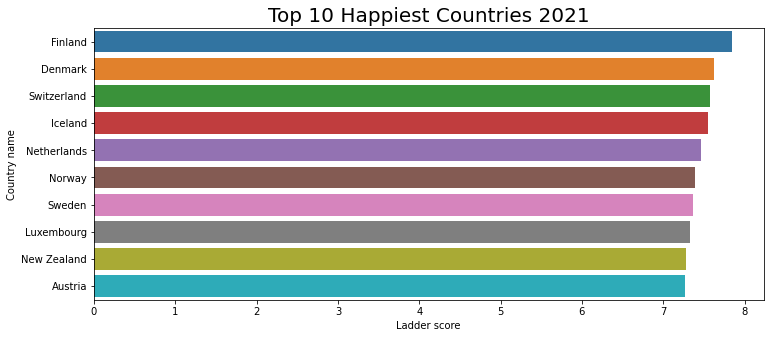

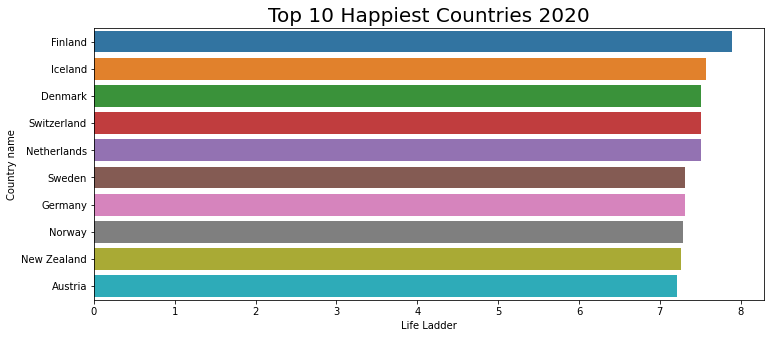

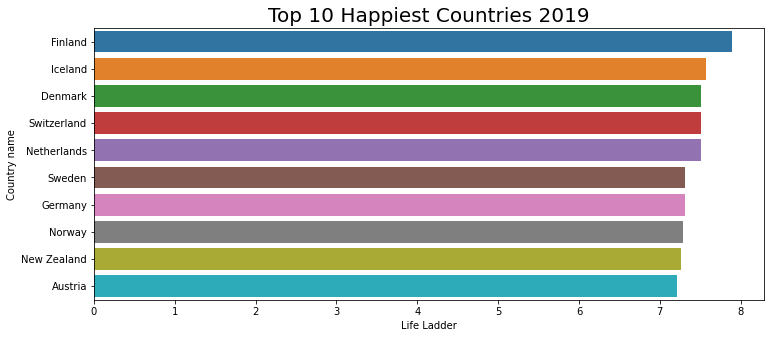

In [ ]:

#2021 top 10 happiest
happiest = data21.sort_values(by='Ladder score', ascending=False).head(10)
plt.figure(figsize= (12, 5))
plt.title('Top 10 Happiest Countries 2021', fontsize=20)
sns.barplot(x= happiest['Ladder score'], y = happiest['Country name'])
plt.show()

#2020 top 10 happiest 
happy2020 = data[data.year==2020]
happiest = happy2020.sort_values(by='Life Ladder', ascending=False).head(10)
plt.figure(figsize= (12, 5))
plt.title('Top 10 Happiest Countries 2020', fontsize=20)
sns.barplot(x= happiest['Life Ladder'], y = happiest['Country name'])
plt.show()

#2019 top 10 happiest
happy2019 = data[data.year==2019]
happiest = happy2020.sort_values(by='Life Ladder', ascending=False).head(10)
plt.figure(figsize= (12, 5))
plt.title('Top 10 Happiest Countries 2019', fontsize=20)
sns.barplot(x= happiest['Life Ladder'], y = happiest['Country name'])
plt.show()

We'd like to compare this to see if previous years also had a similar trend or not.

The top 8 happiest countries alone, all are located in Europe. All together however, 9/10 countries ranked in the top 10 happiest, were found to be located in Europe from the past 3 years.  Although the rankings between some of the countries swayed, Finland ranked the happiest for the past 3 years as well.

## Figure 2: Top 10 Unhappiest Countries

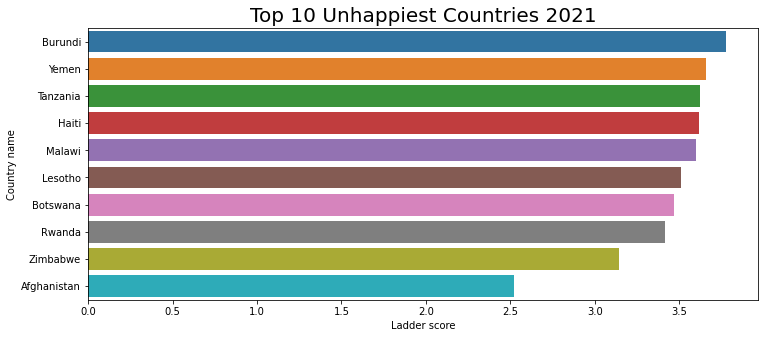

In [ ]:
unhappiest = data21.sort_values(by='Ladder score', ascending=False).tail(10)
plt.figure(figsize= (12, 5))
plt.title('Top 10 Unhappiest Countries 2021', fontsize=20)
sns.barplot(x= unhappiest['Ladder score'], y = unhappiest['Country name'])
plt.show()


All the unhappiest countries ranked lower than 4 on overall happiness. 7/10 of the unhappiest countries were found to be located across Africa. These countries are known to be stricken with poverty. 

We will be analyzing the happiness level across the globe by regions from the 2021 Happiness Report. 
First, we will calculate how many countries there are per region. 

## Figure 3 : Countries per Region

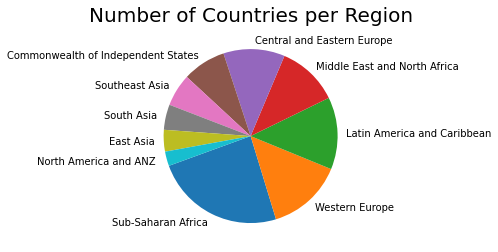

In [ ]:
regCount = data21['Regional indicator'].value_counts()
values= [ 36, 21, 20, 17, 17, 12, 9, 7 , 6 , 4]
regions = [ 'Sub-Saharan Africa','Western Europe', 'Latin America and Caribbean', 'Middle East and North Africa ','Central and Eastern Europe','Commonwealth of Independent States',
           'Southeast Asia','South Asia','East Asia','North America and ANZ ']
plt.pie(values,labels=regions, startangle=200)
plt.ylabel('')
plt.title('Number of Countries per Region', fontsize = '20')

plt.show()

Next, we'll look at the happiness score per region. 

## Figure 4: Average Happiness / Ladder Score per Region

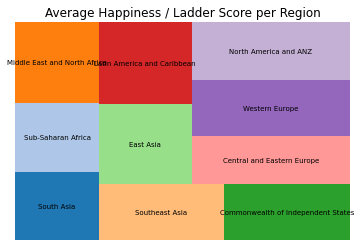

<Figure size 432x18000 with 0 Axes>

<Figure size 576000x648000 with 0 Axes>

In [ ]:
happyscore = data21.groupby('Regional indicator')['Ladder score'].mean().reset_index().sort_values('Ladder score')
happyscores = happyscore['Ladder score']
happyscore_country = happyscore['Regional indicator']
cmap = plt.cm.tab20
colors = []
for i in range(len(happyscores)):
    colors.append(cmap(i))  

squarify.plot(sizes = happyscores, label = happyscore_country,color=colors, text_kwargs={'fontsize': 7},bar_kwargs=None ) 
plt.title('Average Happiness / Ladder Score per Region')
plt.axis('off')
#plt.figure(figsize=(200,250))

plt.figure().set_figheight(250)
plt.figure(figsize=(8000, 9000))
#.set_figwidth(200)
plt.show()
#TRY TO MAKE THIS BIGGER BUT HOW IDK

From the treemap, we can observe that North America and ANZ and Western Europe are the happiest regions in the world. The least happiest from this tree map would be Sub-Saharan Africa and South Asia

**Now that we have a general sense of which regions and countries are the happiest or unhappiest, we will now dive deeper to see if there are any possible social and economic factors that positively correlate between the regions happiness.**


## Figure 5: GDP per Capita vs. Avg. Happiness score per region

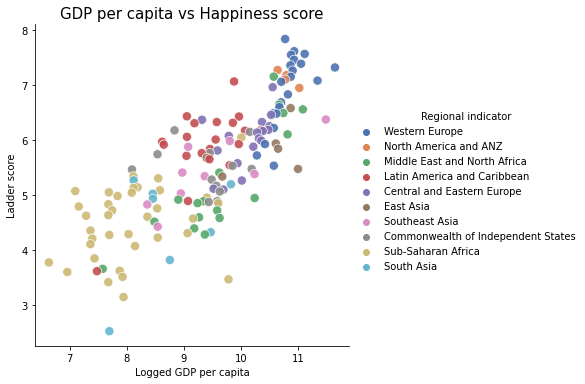

In [ ]:
sns.relplot(x="Logged GDP per capita", y="Ladder score", hue="Regional indicator", data=data21
            ,palette='deep', s=85, alpha=0.9);

plt.title("GDP per capita vs Happiness score", fontsize="15")
plt.show()

Now we will fit a regressoin model for GDP V. Happiness and also print the fitted regression equation. 




### Fig 5 Regression Line


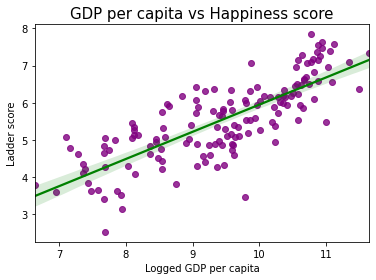

In [ ]:

sns.regplot(x="Logged GDP per capita", y="Ladder score",scatter_kws={"color": 'purple'}, line_kws={"color": "green"}, data=data21 );
y= data21['Ladder score']
plt.title("GDP per capita vs Happiness score", fontsize="15")
plt.show()



We will also print some of the regression coefficients to descreibe the replationship between the GVP and the happiness score (ladder score). These parameters will indicate the direction of the relationship between the predictor and response variable. 

In [ ]:
x= data21['Logged GDP per capita']
y=data21['Ladder score']
x = sm.add_constant(x)
model= sm.OLS(y,x).fit()
print(model.params)

const                   -1.371906
Logged GDP per capita    0.732039
dtype: float64


**From this we can see a positive correlation between the loggeed GDP vs. the happiness score among regions shown from the positive slope. In general we can say based in GDP that countries with higher GDP are happier. Also, the relation is true for countries that have lower GDP, have overall less happier scores.**

## Figure 6: Social Support vs. Avg. Happiness score per region

Next, we will look to see if theres any correlations with social support and the average happiness of each region. 

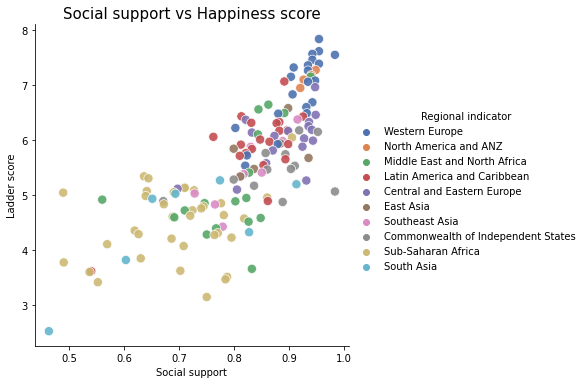

In [ ]:
sns.relplot(x="Social support", y="Ladder score", hue="Regional indicator", data=data21
            ,palette='deep', s=85, alpha=0.9);

plt.title("Social support vs Happiness score", fontsize="15")
plt.show()

### Fig 6 Regression Line

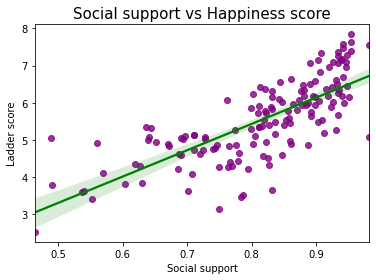

In [ ]:
sns.regplot(x='Social support', y='Ladder score',scatter_kws={"color": 'purple'}, line_kws={"color": "green"}, data=data21 );
y= data21['Ladder score']
plt.title("Social support vs Happiness score", fontsize="15")
plt.show()

In [ ]:
x= data21['Social support']
y=data21['Ladder score']
x = sm.add_constant(x)
model= sm.OLS(y,x).fit()
print(model.params)

const            -0.231479
Social support    7.074997
dtype: float64


**Social support shows a positive correlation with the average happiness ( ladder score) similar to logged GDP. You can slighlthy see an exponential relationship between social support and happiness score. This can show that the relationship and support from freinds, family, and people areound you can greatly influence people's happiness.**

## Figure 7: Healthy Life Expectancy vs. Avg. Happiness score per region

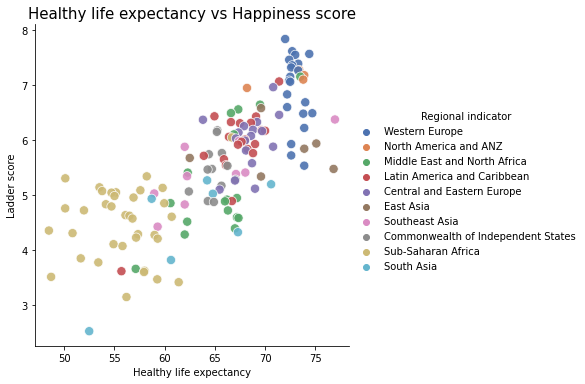

In [ ]:
sns.relplot(x="Healthy life expectancy", y="Ladder score", hue="Regional indicator", data=data21
            ,palette='deep', s=85, alpha=0.9);

plt.title("Healthy life expectancy vs Happiness score", fontsize="15")
plt.show()

### Fig 7 Regression Line

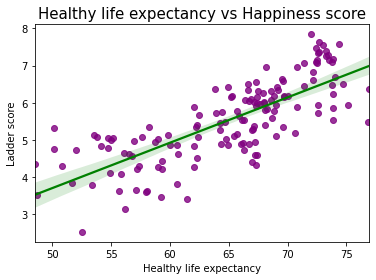

In [ ]:
sns.regplot(x='Healthy life expectancy', y='Ladder score',scatter_kws={"color": 'purple'}, line_kws={"color": "green"}, data=data21 );
y= data21['Ladder score']
plt.title("Healthy life expectancy vs Happiness score", fontsize="15")
plt.show()

In [ ]:
x= data21['Healthy life expectancy']
y=data21['Ladder score']
x = sm.add_constant(x)
model= sm.OLS(y,x).fit()
print(model.params)

const                     -2.395426
Healthy life expectancy    0.121987
dtype: float64


**Similar to social support and GDP, countries with higher life expectancies showed a positive correlation to a happier region. Some of the coutnries with highest life expectancies are Asian regions.**

## Figure 8: Freedom to Make Life Choices vs. Avg. Happiness score per region

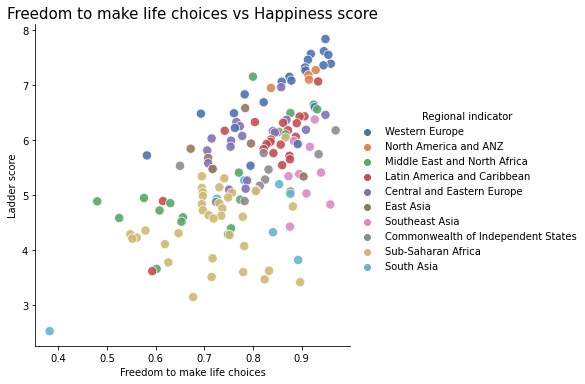

In [ ]:
sns.relplot(x='Freedom to make life choices', y='Ladder score', hue="Regional indicator", data=data21
            ,palette='deep', s=85, alpha=0.9);

plt.title('Freedom to make life choices vs Happiness score', fontsize="15")
plt.show()

### Fig 8 Regression Line

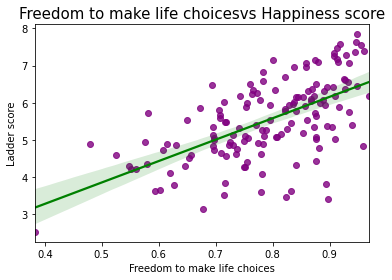

In [ ]:
sns.regplot(x='Freedom to make life choices', y='Ladder score',scatter_kws={"color": 'purple'}, line_kws={"color": "green"}, data=data21 );
y= data21['Ladder score']
plt.title('Freedom to make life choicesvs Happiness score', fontsize="15")
plt.show()

In [ ]:
x= data21['Freedom to make life choices']
y=data21['Ladder score']
x = sm.add_constant(x)
model= sm.OLS(y,x).fit()
print(model.params)

const                           0.974012
Freedom to make life choices    5.759023
dtype: float64


**Yet again, another positive correlation between regions with freedom to make life choices where found to be happier! What is interesting here is that countries with similar levels of freedom to make life choices vary in happiness level. So just because some rgions have similar scores in freedom to make life choices, it's not guaranteed that the overall happiness of that region is higher.**

## Figure 9: Generosity vs. Avg. Happiness score per region

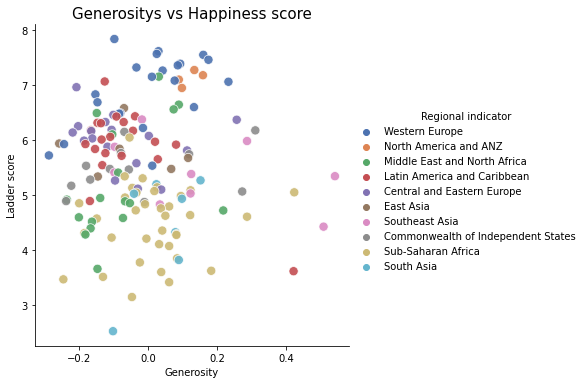

In [ ]:
sns.relplot(x='Generosity', y='Ladder score', hue="Regional indicator", data=data21
            ,palette='deep', s=85, alpha=0.9);

plt.title('Generosity vs Happiness score', fontsize="15")
plt.show()

### Fig 9 Regression Line

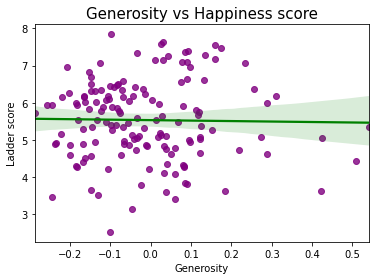

In [ ]:
sns.regplot(x='Generosity', y='Ladder score',scatter_kws={"color": 'purple'}, line_kws={"color": "green"}, data=data21 );
y= data21['Ladder score']
plt.title('Generosity vs Happiness score', fontsize="15")
plt.show()

In [ ]:
x= data21['Generosity']
y=data21['Ladder score']
x = sm.add_constant(x)
model= sm.OLS(y,x).fit()
print(model.params)

const         5.530919
Generosity   -0.126878
dtype: float64


**Now, we observe something a little more different! Generosity doesn't seem to show a positive correlation with happienss in different regions. Theere seeems to be a weak correlation found here. It's interesting to seee that the highest happiest regions actually have a negative score of generosity whereas the coutnries with positive generoristy are regions that are generally less happier.**

## Figure 10: Perceptions of Corruption vs. Avg. Happiness score per region

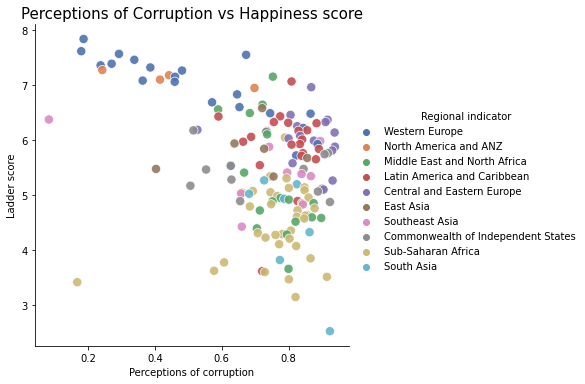

In [ ]:
sns.relplot(x='Perceptions of corruption', y='Ladder score', hue="Regional indicator", data=data21
            ,palette='deep', s=85, alpha=0.9);

plt.title('Perceptions of Corruption vs Happiness score', fontsize="15")
plt.show()

### Fig 10 Regression Line

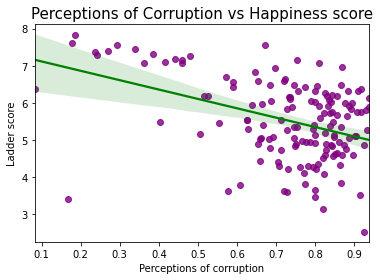

In [ ]:
sns.regplot(x='Perceptions of corruption', y='Ladder score',scatter_kws={"color": 'purple'}, line_kws={"color": "green"}, data=data21 );
y= data21['Ladder score']
plt.title('Perceptions of Corruption vs Happiness score', fontsize="15")
plt.show()

In [ ]:
x= data21['Perceptions of corruption']
y=data21['Ladder score']
x = sm.add_constant(x)
model= sm.OLS(y,x).fit()
print(model.params)

const                        7.368536
Perceptions of corruption   -2.523470
dtype: float64


**You can clearly see that for Western regions and some North American and ANZ regions the perception of corruption has a significant influence on the regions overall happiness. There's a clear negative correlation between perceptions of corruption and the happiness of the regions. However, it's interesting ot note that some Sub-Saharan regions don't have a high preception of corruption yet they are still relatively unhappy.**

# Machine Learning 

In the last section, we visualized the data to get a better understanding of how global happiness varies year to year for various counteries and what factors influence global happiness. We also correlated each column and had a better understanding how the attribure groups are correlated with each other. In this section, I want to build a machine learning model looking more specifically at GDP per capita and other factors in our training set.




# Data Standardization

>  We want to compare GDP per capita for once per country. So we compute mean and standard deviation for each country and add it to the data frame. We also drop any null or NAN values from the GDP column.



In [ ]:
#begin standardizing

standardized = []

for c in data21["Country name"].unique():
  country = data21[(data21==c).any(axis=1)]


  mean = country["Logged GDP per capita"].mean()
  std = np.std(country["Logged GDP per capita"])

  for x in country.itertuples():
        gdp = x[6]
        
        if std != 0 :
            standard_gdp = abs(gdp - mean)/std
        else :
            standard_gdp = 0
        standardized.append(standard_gdp)

data21["Std GDP Per Capita"] = standardized
print(data21.head())

  Country name Regional indicator  ...  Dystopia + residual  Std GDP Per Capita
0      Finland     Western Europe  ...                3.253              6.1225
1      Denmark     Western Europe  ...                2.868              6.1767
2  Switzerland     Western Europe  ...                2.839              6.3283
3      Iceland     Western Europe  ...                2.967              6.2122
4  Netherlands     Western Europe  ...                2.798              6.1468

[5 rows x 11 columns]


**Now we will use a labelEncoder to convert non-numeric column to numerical labels and categorical labels into categorical labels appropriately. To do this, I found a great link that explains why and how we encode data. Click [here](http://ciml.info/) to learn more!**

In [ ]:
#Defining data types
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import LabelEncoder

categorical = ['Country name']
label = sklearn.preprocessing.LabelEncoder()

for column in categorical:
    data21[column] = label.fit_transform(data21[column])
    
numerical = ['Social support', 'Logged GDP per capita']

rc = RobustScaler()
data21[numerical] = rc.fit_transform(data21[numerical])

In [ ]:
print(data21)

     Country name  Regional indicator  ...  Dystopia + residual  Std GDP Per Capita
0              40      Western Europe  ...                3.253              6.1225
1              33      Western Europe  ...                2.868              6.1767
2             128      Western Europe  ...                2.839              6.3283
3              54      Western Europe  ...                2.967              6.2122
4              96      Western Europe  ...                2.798              6.1468
..            ...                 ...  ...                  ...                 ...
144            74  Sub-Saharan Africa  ...                1.800              4.0774
145            15  Sub-Saharan Africa  ...                0.648              4.9487
146           114  Sub-Saharan Africa  ...                1.095              5.3724
147           148  Sub-Saharan Africa  ...                1.205              4.8258
148             0          South Asia  ...                1.895             

In [ ]:
# Assigning x and y columns for model training and testing
y = data21['Std GDP Per Capita']
X = data21.drop('Regional indicator',axis=1)
X.shape, y.shape

((149, 10), (149,))

#4.Model Building
Next we will run a linear regression to test for realationship between Standardized GDP per capita and country. First, we will compute x_train and y_train and observe the mean squared standard error between the predictions and true training set values. To learn more about linear regressions explore this [link](https://towardsdatascience.com/linear-regression-in-6-lines-of-python-5e1d0cd05b8d).


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 12)
X_train.shape, X_test.shape

((119, 10), (30, 10))

In [ ]:
from sklearn.metrics import mean_squared_error

# instantiate and fit the model
regression = LinearRegression()
regression.fit(X_train, y_train)

#predicting the target value from the model
y_test_regression = regression.predict(X_test)
y_train_regression = regression.predict(X_train)

#calculating the accuracy of the model performance
acc_train_regression = regression.score(X_train, y_train)
acc_test_regression = regression.score(X_test, y_test)

#calculating root mean squared error (RMSE)
rmse_train_regression = np.sqrt(mean_squared_error(y_train, y_train_regression))
rmse_test_regression = np.sqrt(mean_squared_error(y_test, y_test_regression))

print("Accuracy on training Data: {:.3f}".format(acc_train_lr)) 
print("Accuracy on test Data: {:.3f}".format(acc_test_lr))
print('\nRMSE of the training set is:', rmse_train_regression)
print('RMSE of the testing set is:', rmse_test_regression)

Accuracy on training Data: 0.843
Accuracy on test Data: 0.832

RMSE of the training set is: 5.756054031998179e-15
RMSE of the testing set is: 6.398584295058596e-15


# Results
Given the strong accuracy on the training and test data, of approximately 0.8 we can say that there is a relationship between standardized GDP per capita values and what makes a country happy. Additionally this shows that the model worked positively since the accuracy of training is very close to testing.  

---



# 5. Conclusion
**So what makes a country happy?**


With this tutorial, we set out to analyze global happiness and its relationship with GDP per capita, social support, freedom, generosity, and perception of corruption. From data analysis and visualization part, we found a positive relationship between a regions happiness and the GDP, life expectancy, and social support. There were negative correlations between perceptions of corruption and happiness, countries that were less corrupt were generally happier. Some interesting conclusions we observed that there was an extremely weak correlation between a countries generosity and being a happier region. Also in the first portion of our analysis we found that among the top 10 happiest countries were European countries. This fell right into place with the rest of our analysis in relationship to the 6 economic/ social factors affecting happiness. The European countries/regions ranked high in GDP, social support, and life expectancy which were all positivily correlated to a happier region. We can generally say that countries with higher GDP per capita, regions with social support, and a longer life expectancy are generally happier. However, there are still so many other factors that affect a country’s happiness and not all factors were considered in this project. 

During the machine learning part, we used Linear Regression model to predict the global happiness and its relationship with GDP Per capita. We found a relationship between a country's happiness and the standardized GDP per Capita value. This was possible because of the high accuracy of the model which is unusual with such a small dataset but if its this strong, this means that there must be a relationship. Going forward, in order to verify the validity of this model, we should enlarge our training dataset to allow for greater generalization.

Overall, there were some shortcomings to this project, for one we didn’t take into consideration the population sizes of each region and how that may also pay role. We didn’t look at trends across years to see how or if there have been changes over time. If we were able to analyze changes we could have seen how unhappier countries became happier and what factors changed along the way. 


**Why is happiness important?**

Happiness is key to long life, healthy outlook, better performance in various areas of life, and life fulfillment. If you would like to learn more, click on this [link](https://www.healthline.com/health/how-to-be-happy). 

# References 
Diener, E. (1984). Subjective well-being. *Psychological Bulletin*. 95, 542 – 575
Mead, Elaine (2020). 6 Benefits of Happiness 

According to the Research. *Positive Psychology*. 
https://positivepsychology.com/benefits-of-happiness/

Singh, Ajaypal (2021). *World Happiness Report 2021*. Kaggle. https://www.kaggle.com/ajaypalsinghlo/world-happiness-report-2021 
